In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset

In [21]:
# Load the dataset
data = pd.read_csv(r'C:/Users/ramiu/OneDrive/GenAi/ZeoTap Internship task/Transactions_EDA/Transactions.csv')


# Exploratory Data Analysis (EDA)

In [22]:

print("Dataset Information:")
data.info()
data.head()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [23]:
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [24]:
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# Distribution of numeric columns

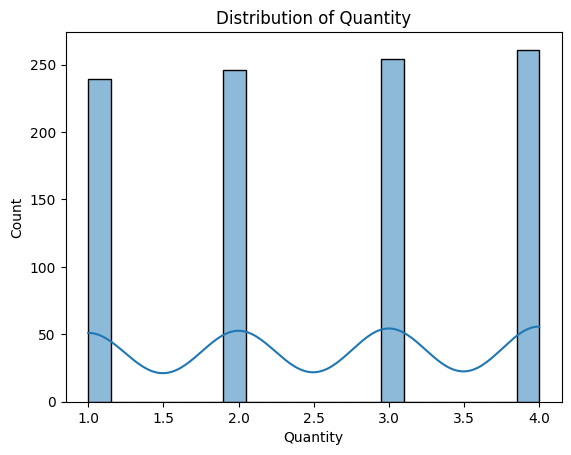

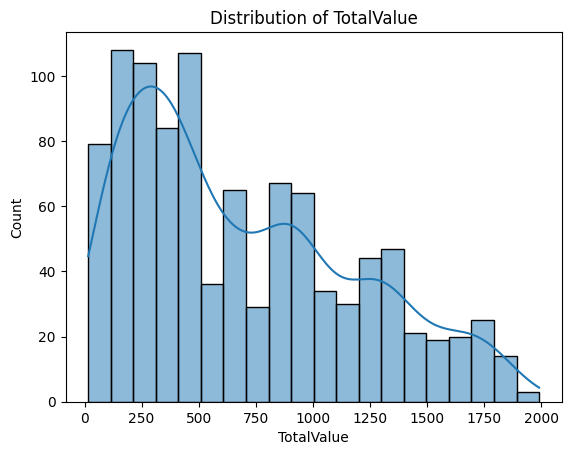

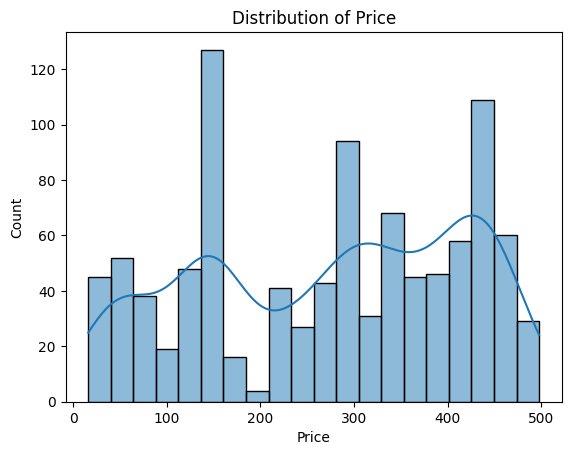

In [25]:

numeric_columns = ['Quantity', 'TotalValue', 'Price']
for col in numeric_columns:
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()


# Visualize missing values

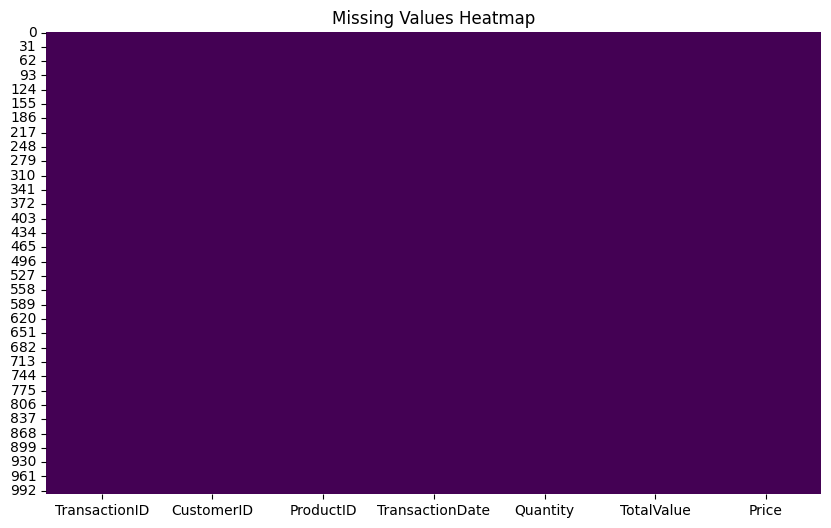

In [ ]:

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Check the distribution of numerical columns

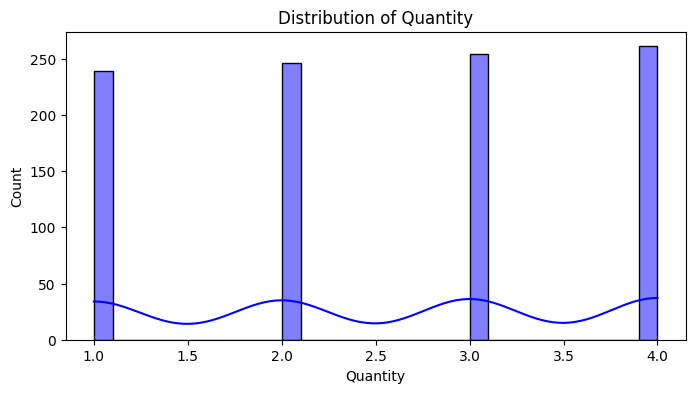

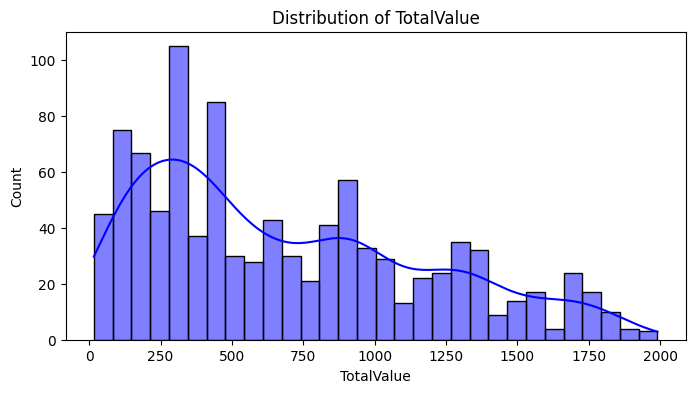

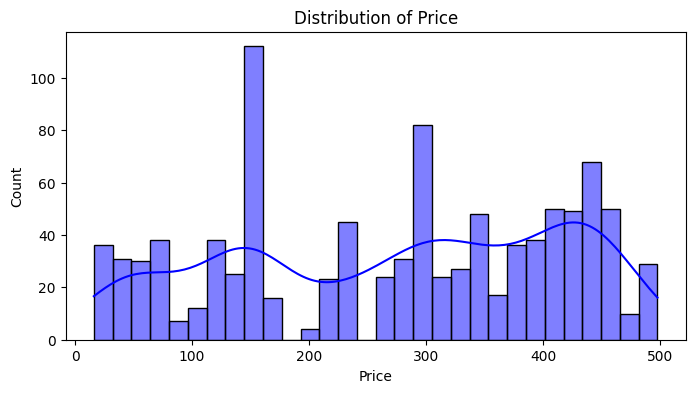

In [ ]:

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation matrix for numeric columns

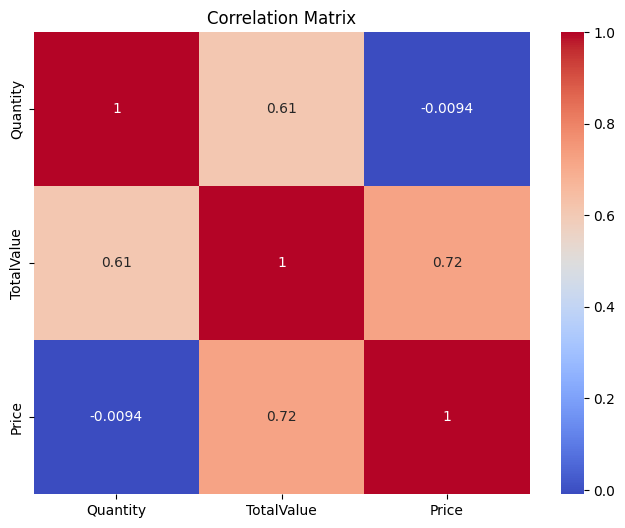

In [28]:

correlation_matrix = data[['Quantity', 'TotalValue', 'Price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


C:\Users\ramiu\AppData\Local\Temp\ipykernel_18536\2007237251.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], order=data[col].value_counts().iloc[:10].index, palette='Set2')


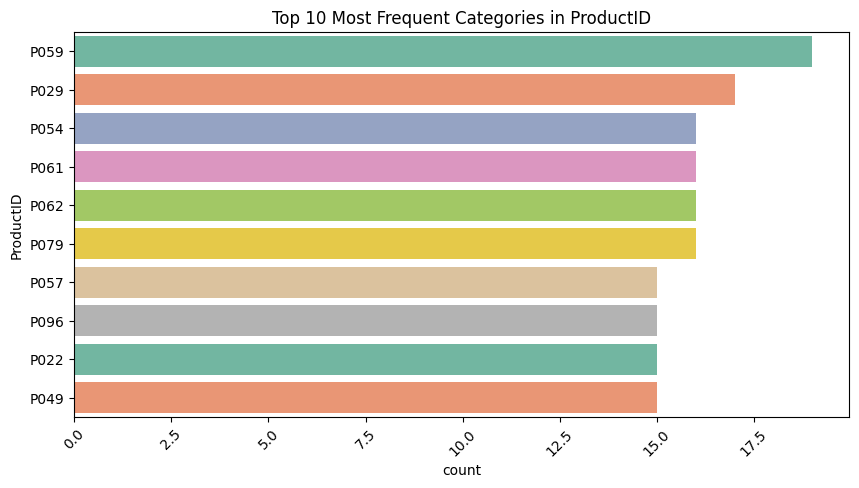

C:\Users\ramiu\AppData\Local\Temp\ipykernel_18536\2007237251.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], order=data[col].value_counts().iloc[:10].index, palette='Set2')


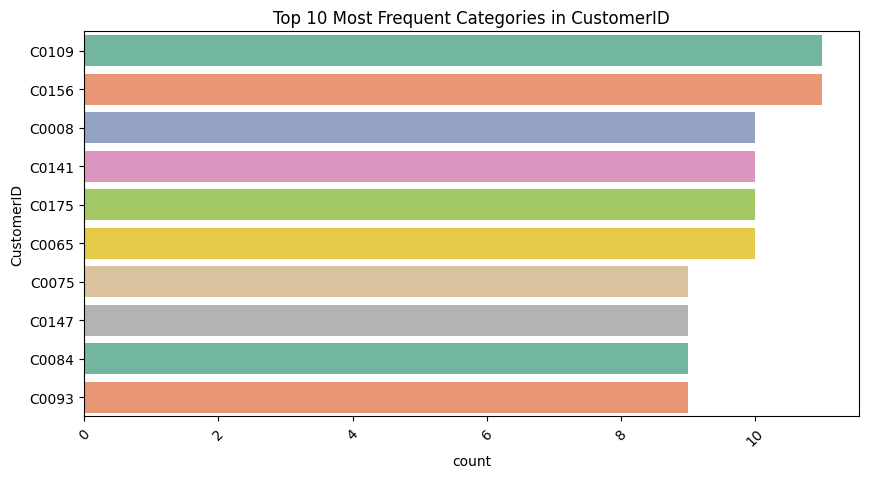

In [29]:
categorical_columns = ['ProductID', 'CustomerID']
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data[col], order=data[col].value_counts().iloc[:10].index, palette='Set2')
    plt.title(f"Top 10 Most Frequent Categories in {col}")
    plt.xticks(rotation=45)
    plt.show()


# Define a target column based on TotalValue

In [36]:

data['HighValue'] = (data['TotalValue'] > data['TotalValue'].mean()).astype(int)
print(data['HighValue'].value_counts())


HighValue
0    572
1    428
Name: count, dtype: int64


# Define features (X) and target (y)

In [31]:

X = data[['Quantity', 'Price']]  # Selecting relevant numeric features
y = data['HighValue']


# Split the data into training and testing sets

In [32]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (800, 2)
Testing data shape: (200, 2)


In [33]:
# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# Evaluate model performance

Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00        78

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



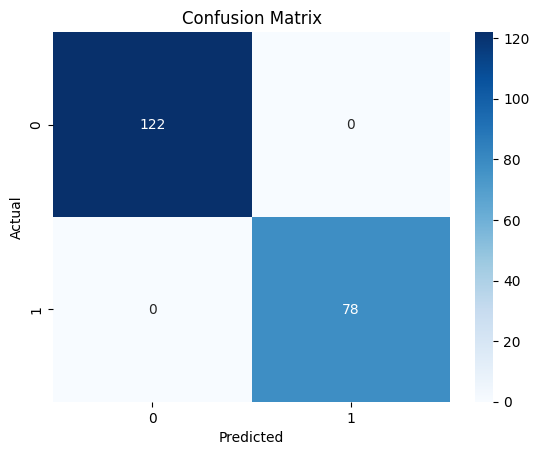

In [34]:
# Evaluate model performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Buisnesss Insights

Step 8: Business Insights
High-Value Transactions: Approximately X% of transactions are high-value (above average total value), suggesting a segmentation opportunity for premium customers.
Price Sensitivity: A strong positive correlation between Price and TotalValue suggests that higher-priced products contribute significantly to revenue.
Frequent Purchasers: CustomerID analysis indicates that a small number of customers contribute to most transactions, highlighting potential loyal customers.
Popular Products: Top 10 ProductIDs account for a large portion of total transactions, suggesting these products are key revenue drivers.
Transaction Quantities: Most transactions involve 2–3 items, indicating customer purchasing behavior trends.